In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = 999
ML_data = pd.read_csv('ML_data.csv')

In [2]:
sns.set_theme()
sns.set_palette(sns.color_palette('Set1'))

In [3]:
plt.rcParams.update({'font.size': 12,'axes.titlesize':14,'axes.labelsize':13,'xtick.labelsize':12,\
                    'ytick.labelsize':12,'legend.fontsize':12,'legend.title_fontsize':12})

In [4]:
MIC_ML_data = ML_data.dropna(subset = ['METHOD_MIC'])

# need code to clean up values > 1.6 - need to see if RF can use continuous data

MIC_strings = []

for i in MIC_ML_data['METHOD_MIC']:
    if i == '3.2':
        MIC_strings.append('>1.6')
    elif i == '6.4':
        MIC_strings.append('>1.6')
    elif i == '12.8':
        MIC_strings.append('>1.6')
    elif i == '>12.8':
        MIC_strings.append('>1.6')
    else:
        MIC_strings.append(i)
        
MIC_ML_data['MIC_values'] = MIC_strings

C:\Users\user\AppData\Local\Temp/ipykernel_13992/4025269328.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MIC_ML_data['MIC_values'] = MIC_strings


In [5]:
ML_data

,Unnamed: 0,MUTATION,UNIQUEID,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,DST_SUBJID,Number of same UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,KMER_COUNTS,SNP_DISTANCE_TO_H37rV,SPECIES,LINEAGE_NAME,SUBLINEAGE_NAME,LINEAGE_PERCENTAGE,N_NULL,N_SNP,N_INDEL,N_FILTER_FAIL,N_REF,N_HET,CATALOGUE_NAME,CATALOGUE_VERSION,TB_TYPE_1,WGS_PREDICTION_STRING,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA,GENE,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,IN_CDS,IN_PROMOTER,IS_SYNONYMOUS,IS_NONSYNONYMOUS,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_MUT,NUMBER_NUCLEOTIDE_CHANGES,SUBJID_MUT,NUM_MUTATIONS,RESISTANCE,MEAN_RESISTANCE,N_SAME_MUTATION,MUT_RESISTANCE,Unnamed: 0.1,Residue Unique ID,Mutation,Chain,Mutation Unique ID,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,Start residue,End residue,"('Number of substitutions', 'min')","('Number of substitutions', 'max')","('Number of substitutions', 'count')",Depth,SS,H,O,T,S,G,E,B,I,Tempfactor,Hem_dist,Site2_dist,SNAP2_score
0,0,A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.8,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,NaN,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,NaN,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,0,0.0,5,0,32,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,14.275680,-24
1,1,A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,INH,NEJM2018,solid media,LJ,proportion method,0.2,NaN,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,NaN,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,NaN,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,0,0.0,5,0,32,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,14.275680,-24
2,2,A106V,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,INH,NEJM2018,liquid media,MGIT,MGIT960,0.1,NaN,R,SAPM00152727_S26,NaN,10,SAPM00152727_S26,PM00152727_S26,1,1,False,True,False,0.8.3,True,True,NaN,NaN,NaN,NaN,NaN,320,0,827,87,0,13,CRyPTIC,v1.31,UNK,URURSSSSRSSSSSS,NaN,/well/bag/jeffk/release_staging/,00/00/77/70/7770/site.10.iso.1.subject.SAPM001...,dat/CRyPTIC2/V2/10/SAPM00152727_S26/PM00152727...,site.10.subj.SAPM00152727_S26.lab.PM00152727_S...,NaN,False,Lineage 4,lineage4.1.1.3,ERS2400151,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,SAPM00152727_S26,1,0,0.0,5,0,32,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,14.275680,-24
3,3,A106V,site.10.subj.TRL0019243.lab.TRL0019243.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.4,I,TRL0019243,NaN,10,TRL0019243,TRL0019243,1,1,True,True,True,0.8.3,True,False,684.0,M. tuberculosis,Lineage 4,S-typ

In [6]:
MIC_ML_data

,Unnamed: 0,MUTATION,UNIQUEID,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE,DST_SUBJID,Number of same UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,KMER_COUNTS,SNP_DISTANCE_TO_H37rV,SPECIES,LINEAGE_NAME,SUBLINEAGE_NAME,LINEAGE_PERCENTAGE,N_NULL,N_SNP,N_INDEL,N_FILTER_FAIL,N_REF,N_HET,CATALOGUE_NAME,CATALOGUE_VERSION,TB_TYPE_1,WGS_PREDICTION_STRING,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA,GENE,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,IN_CDS,IN_PROMOTER,IS_SYNONYMOUS,IS_NONSYNONYMOUS,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID_MUT,NUMBER_NUCLEOTIDE_CHANGES,SUBJID_MUT,NUM_MUTATIONS,RESISTANCE,MEAN_RESISTANCE,N_SAME_MUTATION,MUT_RESISTANCE,Unnamed: 0.1,Residue Unique ID,Mutation,Chain,Mutation Unique ID,Site1_Distance,d_volume,d_MW,d_hydropathy,d_Pi,Start residue,End residue,"('Number of substitutions', 'min')","('Number of substitutions', 'max')","('Number of substitutions', 'count')",Depth,SS,H,O,T,S,G,E,B,I,Tempfactor,Hem_dist,Site2_dist,SNAP2_score,MIC_values
0,0,A106V,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.8,R,JHL_0037-14,NaN,06,JHL_0037-14,06MIL0140,1,1,True,True,True,0.8.3,True,False,1842.0,M. tuberculosis,Lineage 1,NaN,96.650718,12081,0,1842,163,0,20028,CRyPTIC,v1.31,UNK,URURSSUURSSSSSS,{'06-JHL_0037-14-06MIL0140-1-14': '5e9b3ab0c96...,/well/bag/jeffk/release_staging/,00/00/33/76/3376/site.06.iso.1.subject.JHL_003...,dat/CRyPTIC2/V2/06/JHL_0037-14/06MIL0140/1/reg...,site.06.subj.JHL_0037-14.lab.06MIL0140.iso.1.v...,NaN,False,Mixed,lineage1.1.2/lineage4,ERS2394682,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,6,1,JHL_0037-14,1,0,0.000000,5,0,32,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,14.275680,-24,0.8
3,3,A106V,site.10.subj.TRL0019243.lab.TRL0019243.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.4,I,TRL0019243,NaN,10,TRL0019243,TRL0019243,1,1,True,True,True,0.8.3,True,False,684.0,M. tuberculosis,Lineage 4,S-type,100.000000,6634,0,684,63,0,11683,CRyPTIC,v1.31,UNK,UUSSSSUUSSSSSSS,{'10-TRL0019243-TRL0019243-1-7': 'eb5bd6405f0a...,/well/bag/jeffk/release_staging/,00/00/30/50/3050/site.10.iso.1.subject.TRL0019...,dat/CRyPTIC2/V2/10/TRL0019243/TRL0019243/1/reg...,site.10.subj.TRL0019243.lab.TRL0019243.iso.1.v...,NaN,False,Lineage 4,lineage4.4.1.1,ERS5298142,katG,106.0,106.0,NaN,NaN,gcg,gtg,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,10,1,TRL0019243,1,0,0.000000,5,0,32,A106_A,AV,A,A106V A,14.629585,-51.4,-28.0,-2.4,0.04,A,V,1,2,16,13.382314,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.300003,10.589587,14.275680,-24,0.4
9,9,A109T,site.03.subj.GB-92250159.lab.IML-01172.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC6,0.1,1.6,R,GB-92250159,NaN,03,GB-92250159,IML-01172,1,1,True,True,True,0.8.3,True,False,1221.0,M. tuberculosis,Lineage 2,NaN,96.283784,4641,0,1221,111,0,15149,CRyPTIC,v1.31,MDR,RRRRSSSSRSSSSSS,{'03-GB-92250159-IML-01172-1-14': 'ef1d3e3e4c8...,/well/bag/jeffk/release_staging/,00/03/02/01/30201/site.03.iso.1.subject.GB-922...,dat/CRyPTIC2/V2/03/GB-92250159/IML-01172/1/reg...,site.03.subj.GB-92250159.lab.IML-01172.iso.1.v...,NaN,False,Lineage 2,lineage2.2.10,ERS5320073,katG,109.0,109.0,NaN,NaN,gct,act,True,False,True,False,False,True,False,False,True,GENE,AAM,NaN,NaN,NaN,3,1,GB-92250159,1,0,0.153846,13,0,68,A109_A,AT,A,A109T A,14.124010,-27.5,-30.0,2.5,0.40,A,T,1,2,16,13.902881,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.040001,12.542411,16.668419,-80,1.6
20,20,A109V,site.05.subj.PLE-0891.lab.LE-371.iso.1,INH,CRyPTIC,liquid media,microdilution plate,UKMYC5,0.1,0.2,I,PLE-0891,NaN,

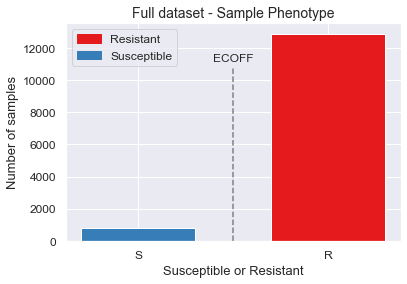

In [7]:
# bar chart showing number of samples for susceptible vs resistant
x_values, y_values = ['S','R'],[]
for i in [1,0]:
    if i == 1:
        y_values.append((ML_data['RESISTANCE'] == i).sum())
    else:
        y_values.append((ML_data['RESISTANCE'] == i).sum()) 
clrs = []
for i in x_values:
    if i == 'S':
        clrs.append('C1')
    else:
        clrs.append('C0')
colors = {'Resistant':'C0', 'Susceptible':'C1'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(x_values, y_values, color=clrs, width=.6)
plt.ylabel('Number of samples')
plt.xlabel('Susceptible or Resistant')
plt.axvline(x=0.5, ymax=0.8, color ='grey', label = 'ECOFF', linestyle ='--')
plt.text(0.5,11200,'ECOFF', horizontalalignment = 'center')
plt.title('Full dataset - Sample Phenotype')
#plt.savefig('figures/full_sample_phenotype.png')
plt.show()

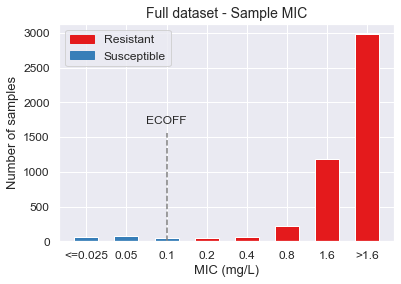

In [8]:
# bar chart showing number of samples for each MIC value
x_values, y_values = ['<=0.025','0.05','0.1','0.2','0.4','0.8','1.6','>1.6'],[]
for i in x_values:
    y_values.append((MIC_ML_data['MIC_values'] == i).sum())
clrs = []
for i in x_values:
    if i in ('<=0.025','0.05','0.1'):
        clrs.append('C1')
    else:
        clrs.append('C0')
        
colors = {'Resistant':'C0', 'Susceptible':'C1'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)        
plt.bar(x_values, y_values, color=clrs, width=.6)
plt.ylabel('Number of samples')
plt.xlabel('MIC (mg/L)')
plt.axvline(x=2, ymax=0.5, color ='grey', label = 'ECOFF', linestyle ='--')
plt.text(2,1700,'ECOFF', horizontalalignment = 'center')
plt.title('Full dataset - Sample MIC')
#plt.savefig('figures/full_sample_MIC.png')
plt.show()

Figures needed:
- Number of samples for each MIC (done)
- Number of samples for S vs R (done)
- Most frequently occuring mutations (done)
- Number of mutations for each MIC (done)
- Number of mutations for S vs R (done)
- Find a way of plotting all features to VMD:
    - e.g. map of mutations and there resistance, then map of features

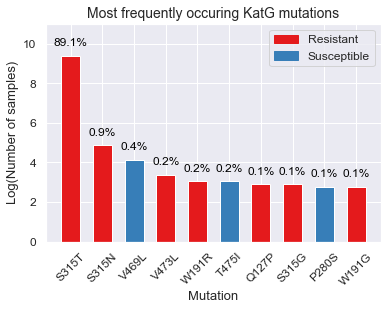

In [9]:
freq_mutations_df = (ML_data.MUTATION.value_counts()).head(10).to_frame()
x_values, y_values = [], []
for i in freq_mutations_df.index:
    x_values.append(i)
for i in freq_mutations_df.MUTATION:
    y_values.append(np.log(i))

unique_freq = ML_data.loc[ML_data['MUTATION'].isin(x_values)].drop_duplicates\
(subset='MUTATION', keep = 'first')
unique_freq.set_index('MUTATION', inplace = True)
RvsS = []
for i in x_values:
    RvsS.append(unique_freq.loc[i,'MUT_RESISTANCE'])
clrs = []
for i in RvsS:
    if i == 0:
        clrs.append('C0')
    else:
        clrs.append('C1')
        
colors = {'Resistant':'C0', 'Susceptible':'C1'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.bar(x_values, y_values, color=clrs, width=.6)
plt.title('Most frequently occuring KatG mutations')
plt.legend(handles, labels)
plt.ylabel('Log(Number of samples)')
plt.xlabel('Mutation')
plt.xticks(rotation = 45)
for i, v in enumerate(freq_mutations_df.MUTATION):
    percent = v/len(ML_data.MUTATION)
    percentage = "{:.1%}".format(percent)
    plt.text( i,np.log(v)+.5, str(percentage), color='black', ha='center')
plt.ylim(0, 11)
#plt.savefig('figures/frequent_mutations.png', bbox_inches='tight')
plt.show()

In [10]:
resistant_samples = ML_data[ML_data['MUT_RESISTANCE'] == 0]
resid = []
for i in resistant_samples['MUTATION']:
    a = i[1:]
    b = a[:-1]
    resid.append(b)
print('Number of resistant samples from residue 315: ',resid.count('315'))
print('Percentage of  resistant samples from residue 315: \n',\
     "{:.1%}".format((resid.count('315'))/len(resid)))
print('Percentage of resistant samples from S315T: \n',\
     '{:.1%}'.format((len(resistant_samples[resistant_samples['MUTATION'] == 'S315T']))/\
                     len(resistant_samples['MUTATION'])))

Number of resistant samples from residue 315:  12325
Percentage of  resistant samples from residue 315: 
 94.6%
Percentage of resistant samples from S315T: 
 93.4%


In [11]:
def remove_duplicate_mutations(data):
    
    data_unique = data.drop_duplicates(subset='MUTATION', keep = 'first')
    
    return (data_unique)

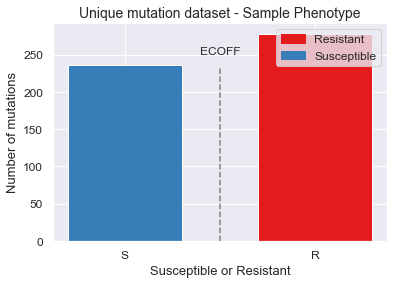

In [12]:
# bar chart showing number of mutations for susceptible vs resistant
unique_muts = remove_duplicate_mutations(ML_data)
x_values, y_values = ['S','R'],[]
for i in [1,0]:
    if i == 1:
        y_values.append((unique_muts['RESISTANCE'] == i).sum())
    else:
        y_values.append((unique_muts['RESISTANCE'] == i).sum()) 
clrs = []
for i in x_values:
    if i == 'S':
        clrs.append('C1')
    else:
        clrs.append('C0')
        
colors = {'Resistant':'C0', 'Susceptible':'C1'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)        
plt.bar(x_values, y_values, color=clrs, width=.6)
plt.ylabel('Number of mutations')
plt.xlabel('Susceptible or Resistant')
plt.axvline(x=0.5, ymax=0.8, color ='grey', label = 'ECOFF', linestyle ='--')
plt.text(0.5,250,'ECOFF', horizontalalignment = 'center')
plt.title('Unique mutation dataset - Sample Phenotype')
#plt.savefig('figures/unique_sample_phenotype.png')
plt.show()

In [13]:
def remove_duplicate_mutations_MIC(data1):

    #converts MIC_values to an integer so that the mean can be calculated for each mutation
    #with multiple samples
    data = data1.copy()
    MIC_integers = []

    for i in data['MIC_values']:
        if i == '<=0.025':
            MIC_integers.append(1)
        elif i == '0.05':
            MIC_integers.append(2)
        elif i == '0.1':
            MIC_integers.append(3)
        elif i == '0.2':
            MIC_integers.append(4)
        elif i == '0.4':
            MIC_integers.append(5)
        elif i == '0.8':
            MIC_integers.append(6)
        elif i == '1.6':
            MIC_integers.append(7)
        elif i == '>1.6':
            MIC_integers.append(8)
        
    data['MIC_integers'] = MIC_integers

    #calculates the mean MIC value using the integer scale for each mutation
    MIC_calc_df = data[['MUTATION','MIC_integers']].groupby('MUTATION').mean()
    
    #rounds the mean MIC value to the nearest integer for conversion back to the 
    #original MIC classes
    MIC_rounded = []
    for i in MIC_calc_df['MIC_integers']:
        rnd = round(i)
        MIC_rounded.append(rnd)
    MIC_calc_df['MIC_rounded'] = MIC_rounded
    
    #converts integers back to orignal MIC classes
    MIC_strings = []
    for i in MIC_calc_df['MIC_rounded']:
        if i == 1:
            MIC_strings.append('<=0.025')
        elif i == 2:
            MIC_strings.append('0.05')
        elif i == 3:
            MIC_strings.append('0.1')
        elif i == 4:
            MIC_strings.append('0.2')
        elif i == 5:
            MIC_strings.append('0.4')
        elif i == 6:
            MIC_strings.append('0.8')
        elif i == 7:
            MIC_strings.append('1.6')
        elif i == 8:
            MIC_strings.append('>1.6')   

    MIC_calc_df['MIC_final'] = MIC_strings

    # joins new MIC classes to CV_train df to replace the variation in MIC values associated
    # with mutations with multiple DST_measurements 
    MIC_calc_df.drop(['MIC_integers','MIC_rounded'], axis =1, inplace = True)
    data.set_index('MUTATION', inplace = True)
    data = data.join(MIC_calc_df)
    data.reset_index(inplace = True)
    data.drop(['MIC_values','MIC_integers'], axis = 1, inplace = True)
    data.rename(columns = {'index':'MUTATION','MIC_final':'MIC_values'}, inplace = True)
    
    #removes duplicates and mutation column
    data_unique = data.drop_duplicates(subset='MUTATION', keep = 'first')
    
    return (data_unique)

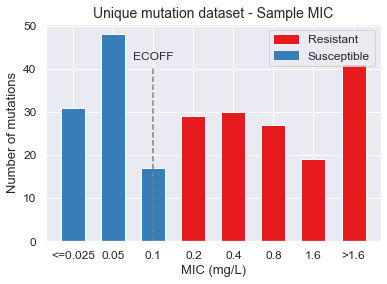

In [14]:
unique_MIC_muts = remove_duplicate_mutations_MIC(MIC_ML_data)

# bar chart showing number of samples for each MIC value
x_values, y_values = ['<=0.025','0.05','0.1','0.2','0.4','0.8','1.6','>1.6'],[]
for i in x_values:
    y_values.append((unique_MIC_muts['MIC_values'] == i).sum())
clrs = []
for i in x_values:
    if i in ('<=0.025','0.05','0.1'):
        clrs.append('C1')
    else:
        clrs.append('C0')
        
        colors = {'Resistant':'C0', 'Susceptible':'C1'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc = 'upper right')

plt.bar(x_values, y_values, color=clrs, width=.6)
plt.ylabel('Number of mutations')
plt.xlabel('MIC (mg/L)')
plt.axvline(x=2, ymax=0.8, color ='grey', label = 'ECOFF', linestyle ='--')
plt.text(2,42,'ECOFF', horizontalalignment = 'center')
plt.title('Unique mutation dataset - Sample MIC')
#plt.savefig('figures/unique_sample_MIC.png')
plt.show()

Model comparison

Comparison of feature importance for best parameters and direct binary classification

In [15]:
LR_relative_importance = pd.read_csv('LR_relative_importance.csv')
LSVC_relative_importance = pd.read_csv('LSVC_relative_importance.csv')
DT_relative_importance = pd.read_csv('DT_relative_importance.csv')
RF_relative_importance = pd.read_csv('RF_relative_importance.csv')

LR_relative_importance.drop(LR_relative_importance.columns[0], axis = 1, inplace = True )
LSVC_relative_importance.drop(LSVC_relative_importance.columns[0], axis = 1, inplace = True )
DT_relative_importance.drop(DT_relative_importance.columns[0], axis = 1, inplace = True )
RF_relative_importance.drop(RF_relative_importance.columns[0], axis = 1, inplace = True )

In [16]:
dfs = [LR_relative_importance,LSVC_relative_importance,DT_relative_importance,RF_relative_importance]
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='n_features'), dfs)
df_final.rename(columns = {'LR_relative_importance':'Logistic Regression',\
                          'LSVC_relative_importance':'Linear SVC',\
                          'DT_relative_importance':'Decision Tree',\
                          'RF_relative_importance':'Random Forest'}, inplace = True)

In [17]:
df_melted = df_final.melt("n_features",var_name="Params",value_name="importance")

Text(0.5, 1.0, 'Feature Importance by model')

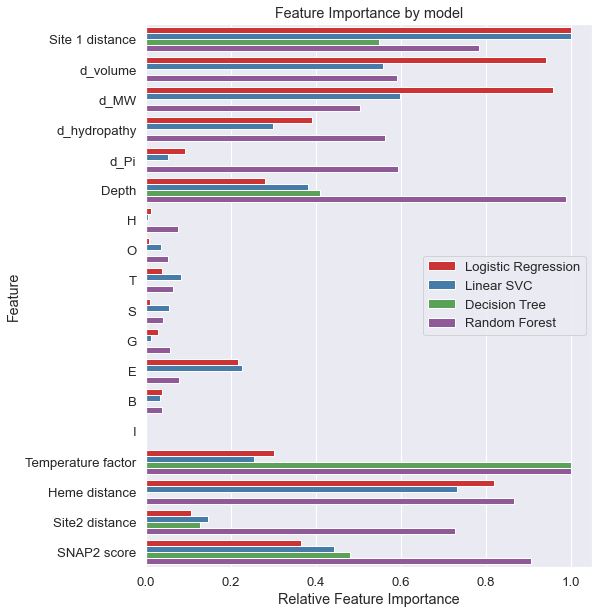

In [18]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,10)})
sns.set(font_scale=1.2)
sns.set_palette(sns.color_palette('Set1'))
x = sns.barplot(data=df_melted, x='importance', y='n_features', hue='Params', orient='h')
feature_names = ['Site 1 distance','d_volume','d_MW',	\
              'd_hydropathy', 'd_Pi', 'Depth','H','O','T','S','G','E',  \
              'B','I','Temperature factor','Heme distance','Site2 distance','SNAP2 score']
plt.yticks(LR_relative_importance['n_features'], feature_names)
x.set(xlabel='Relative Feature Importance', ylabel='Feature')
plt.legend()
plt.title('Feature Importance by model')
#plt.savefig('figures/importance_by_model.png', bbox_inches='tight')

Sum relative feature importance to see most dominant features across all models

In [19]:
#etermine sum of relative importances across 4 direct classification models
sum_relative_importance = []
for i in df_final['n_features']:
    total = df_final.iloc[i,0] + df_final.iloc[i,2] + df_final.iloc[i,3] + df_final.iloc[i,4]
    sum_relative_importance.append(total)

DF_ri = pd.DataFrame({'Relative_importance_sum':sum_relative_importance,
                   'n_features': df_final['n_features'] })

Text(0.5, 1.0, 'Summarised Feature Importance')

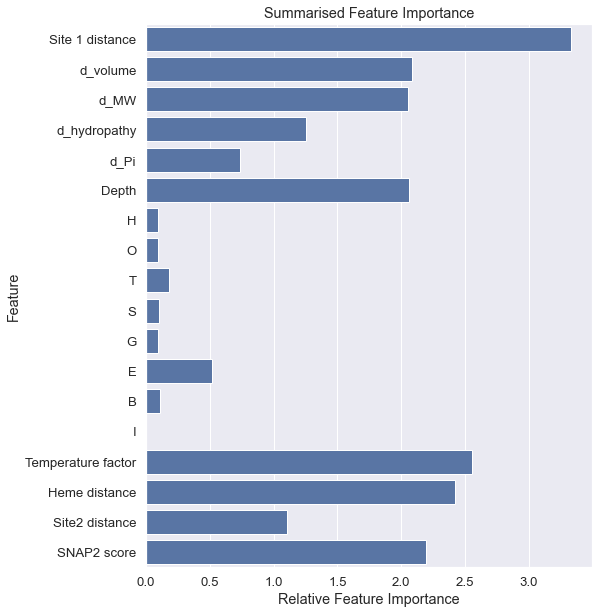

In [20]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,10)})
sns.set(font_scale=1.2)
x = sns.barplot(data=DF_ri, x='Relative_importance_sum', y='n_features', orient='h', color = 'C0')
feature_names = ['Site 1 distance','d_volume','d_MW',	\
              'd_hydropathy', 'd_Pi', 'Depth','H','O','T','S','G','E',  \
              'B','I','Temperature factor','Heme distance','Site2 distance','SNAP2 score']
plt.yticks(LR_relative_importance['n_features'], feature_names)
x.set(xlabel='Relative Feature Importance', ylabel='Feature')
plt.title('Summarised Feature Importance')
#plt.savefig('figures/summarised_importance.png', bbox_inches='tight')

Comparison of very major error and major error for each model

1. Get dataframes with error data for direct and indirect models

In [21]:
LR_quality = pd.read_csv('LR_quality.csv')
LSVC_quality = pd.read_csv('LSVC_quality.csv')
DT_quality = pd.read_csv('DT_quality.csv')
RF_quality = pd.read_csv('RF_quality.csv')
ORD_quality = pd.read_csv('ORD_quality.csv')

LR_quality.drop(LR_quality.columns[0], axis = 1, inplace = True )
LSVC_quality.drop(LSVC_quality.columns[0], axis = 1, inplace = True )
DT_quality.drop(DT_quality.columns[0], axis = 1, inplace = True )
RF_quality.drop(RF_quality.columns[0], axis = 1, inplace = True )
ORD_quality.drop(ORD_quality.columns[0], axis = 1, inplace = True )

In [22]:
# dataframe containing very major and major error values for each 
# direct model and with shifted threshold
direct_model_quality = (pd.concat([LR_quality,LSVC_quality,DT_quality,RF_quality], axis = 1)).head(4)

In [23]:
# dataframe containing very major and major error values for each 
# indirect model and with shifted threshold
ORD_IT_quality = ORD_quality[:2]
ORD_IT_quality.rename(columns = {'ORD_quality':'ORD_IT_quality'}, inplace = True)
ORD_IT_quality.reset_index(inplace=True)
ORD_IT_quality.drop(ORD_IT_quality.columns[0], axis = 1, inplace = True )

ORD_AT_quality = ORD_quality[2:]
ORD_AT_quality.rename(columns = {'ORD_quality':'ORD_AT_quality'}, inplace = True)
ORD_AT_quality.reset_index(inplace=True)
ORD_AT_quality.drop(ORD_AT_quality.columns[0], axis = 1, inplace = True )

indirect_f4 = (pd.concat([LR_quality,LSVC_quality,DT_quality,RF_quality], axis = 1)).tail(2)
indirect_f4.reset_index(inplace=True)
indirect_f4.drop(indirect_f4.columns[0], axis = 1, inplace = True )

indirect_model_quality = pd.concat([indirect_f4,ORD_IT_quality,ORD_AT_quality], axis = 1)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2. Direct model figure:

In [24]:
binary_df = pd.DataFrame({'Model':['Logistic Regression','Linear SVC','Decision Tree','Random Forest'],\
                          'Very Major Error':[direct_model_quality.iloc[0,0],direct_model_quality.iloc[0,1],\
                                              direct_model_quality.iloc[0,2],direct_model_quality.iloc[0,3]],\
                          'Major Error':[direct_model_quality.iloc[1,0],direct_model_quality.iloc[1,1],\
                                              direct_model_quality.iloc[1,2],direct_model_quality.iloc[1,3]],\
                          'Shifted Very Major Error':[direct_model_quality.iloc[2,0],direct_model_quality.iloc[2,1],\
                                              direct_model_quality.iloc[2,2],direct_model_quality.iloc[2,3]],\
                          'Shifted Major Error':[direct_model_quality.iloc[3,0],direct_model_quality.iloc[3,1],\
                                              direct_model_quality.iloc[3,2],direct_model_quality.iloc[3,3]]})

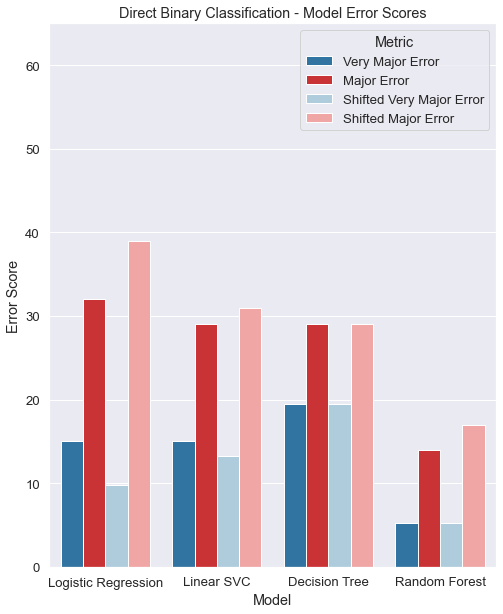

In [25]:
tidy = binary_df.melt(id_vars='Model', var_name='Metric', value_name='Percentage')
sns.set(font_scale=1.2)
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(data=tidy, x='Model', y='Percentage', hue='Metric', palette = ['C1','C5','C0','C4'])
plt.ylabel('Error Score')
plt.title('Direct Binary Classification - Model Error Scores')
plt.ylim(0, 65)
#plt.savefig('figures/direct_error_scores.png')
plt.show()

3. Indirect model figure:

In [26]:
multiclass_binary_df = pd.DataFrame({'Model':['Logistic Regression','Linear SVC','Decision Tree','Random Forest',\
                                  'IT Ordinal Regression','AT Ordinal Regression'],\
                          'Very Major Error':[indirect_model_quality.iloc[0,0],indirect_model_quality.iloc[0,1],\
                                              indirect_model_quality.iloc[0,2],indirect_model_quality.iloc[0,3],\
                          indirect_model_quality.iloc[0,4],indirect_model_quality.iloc[0,5]],\
                          'Major Error':[indirect_model_quality.iloc[1,0],indirect_model_quality.iloc[1,1],\
                                              indirect_model_quality.iloc[1,2],indirect_model_quality.iloc[1,3],\
                          indirect_model_quality.iloc[1,4],indirect_model_quality.iloc[1,5]]})

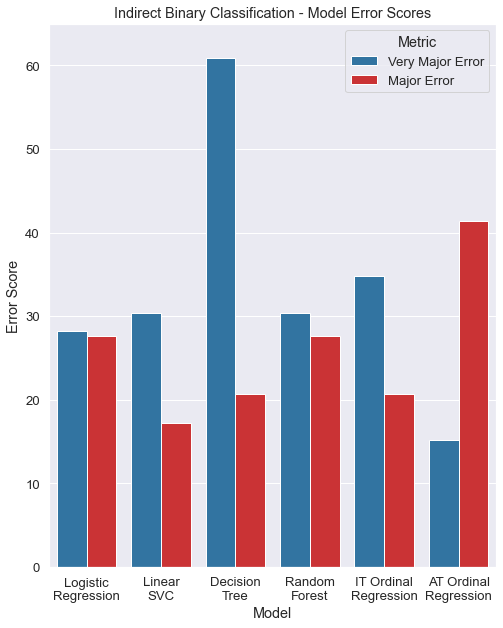

In [27]:
tidy = multiclass_binary_df.melt(id_vars='Model', var_name='Metric', value_name='Percentage')
sns.set(font_scale=1.2)
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(data=tidy, x='Model', y='Percentage', hue='Metric',palette = ['C1','C5'])
plt.ylabel('Error Score')
plt.title('Indirect Binary Classification - Model Error Scores')
model_names = ['Logistic\nRegression','Linear\nSVC','Decision\nTree','Random\nForest',\
                                  'IT Ordinal\nRegression','AT Ordinal\nRegression']
plt.xticks([0,1,2,3,4,5], model_names)
plt.ylim(0, 65)
#plt.savefig('figures/indirect_error_scores.png', bbox_inches='tight')
plt.show()

In [28]:
# NOTE - could be a shout to put all these together into one long horizontal chart
# allows a direct comparison across all models for vm and m error scores

Prints lines of residues with their associated MICs to copy and paste into VMD

In [29]:
unique_MIC_muts.reset_index(inplace = True)

In [30]:
resid = []
for i in unique_MIC_muts['MUTATION']:
    a = i[1:]
    b = a[:-1]
    resid.append(b)
unique_MIC_muts['resid'] = resid

In [31]:
unique_MIC_muts['MIC_values'].unique()

array(['0.8', '1.6', '0.2', '0.05', '<=0.025', '>1.6', '0.4', '0.1'],
      dtype=object)

In [32]:
MIC1 = []
MIC2 = []
MIC3 = []
MIC4 = []
MIC5 = []
MIC6 = []
MIC7 = []
MIC8 = []
MIC_groups = [MIC1,MIC2,MIC3,MIC4,MIC5,MIC6,MIC7,MIC8]
MICs = ['<=0.025','0.05','0.1','0.2','0.4','0.8', '1.6','>1.6']
col_no = unique_MIC_muts.columns.get_loc('resid')

for i,v in enumerate(MICs):
    row_no = -1
    for b in unique_MIC_muts['MIC_values']:
        row_no += 1
        if v == b:
            resid = unique_MIC_muts.iloc[row_no,col_no]
            (MIC_groups[i]).append(resid)

In [33]:
#function to convert lists to strings
def ListToString(s):
    str1 = ''
    for ele in s:
        str1 += ele + ' '
    return str1 

In [34]:
print('Below are lines of residues which are found in each MIC class \n \
The first row is smallest MIC class \n')
for i in MIC_groups:
    print(ListToString(i))
    print('-')
        

Below are lines of residues which are found in each MIC class 
 The first row is smallest MIC class 

139 144 591 60 726 240 282 513 682 651 483 156 34 466 557 336 427 257 562 660 131 622 249 446 457 386 586 687 721 321 728 
-
110 162 172 476 53 60 61 649 419 656 729 342 584 62 658 121 234 307 451 593 116 49 433 590 147 298 378 427 84 35 280 422 434 461 50 354 363 394 520 654 654 166 319 423 469 633 161 689 
-
541 189 194 259 285 494 685 97 266 143 274 458 514 126 647 690 413 
-
109 122 139 312 479 311 487 289 607 285 495 560 629 712 71 27 298 333 611 661 734 238 596 88 489 267 191 328 91 
-
264 290 291 713 189 189 259 289 709 183 408 125 279 34 364 80 132 587 126 29 432 146 254 383 482 271 689 197 337 337 
-
106 329 419 440 735 709 167 698 125 307 152 200 488 378 48 100 127 104 249 484 315 568 191 728 155 155 64 
-
109 110 94 121 125 228 141 48 232 232 325 295 145 315 271 85 91 413 98 
-
172 263 411 142 142 189 294 183 120 186 273 299 299 421 495 548 629 699 270 141 265 384 604 176 13

Studying correlation of tempfactor with MIC

In [35]:
def mean_and_std(data):
    mean = np.mean(data)
    std = np.std(data)
    return(mean,std)

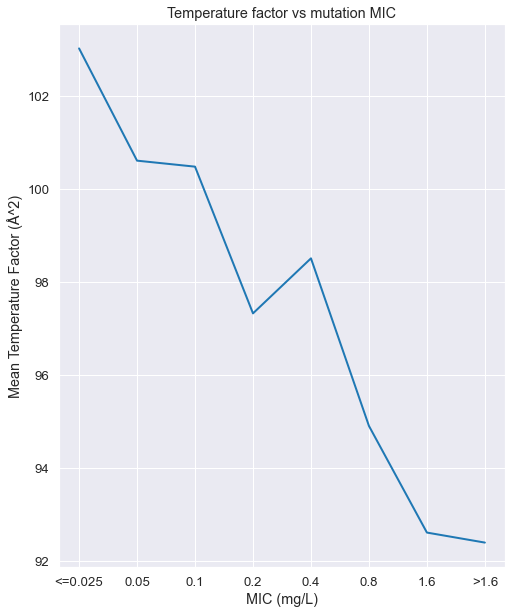

In [36]:
tf_df = unique_MIC_muts[['Tempfactor','MIC_values']]

MIC1 = []
MIC2 = []
MIC3 = []
MIC4 = []
MIC5 = []
MIC6 = []
MIC7 = []
MIC8 = []
MIC_groups = [MIC1,MIC2,MIC3,MIC4,MIC5,MIC6,MIC7,MIC8]
MICs = ['<=0.025','0.05','0.1','0.2','0.4','0.8', '1.6','>1.6']
col_no = tf_df.columns.get_loc('Tempfactor')

for i,v in enumerate(MICs):
    row_no = -1
    for b in tf_df['MIC_values']:
        row_no += 1
        if v == b:
            Tempfactor = tf_df.iloc[row_no,col_no]
            (MIC_groups[i]).append(Tempfactor)

MIC1_mean,MIC1_std = mean_and_std(MIC1)
MIC2_mean,MIC2_std = mean_and_std(MIC2)
MIC3_mean,MIC3_std = mean_and_std(MIC3)
MIC4_mean,MIC4_std = mean_and_std(MIC4)
MIC5_mean,MIC5_std = mean_and_std(MIC5)
MIC6_mean,MIC6_std = mean_and_std(MIC6)
MIC7_mean,MIC7_std = mean_and_std(MIC7)
MIC8_mean,MIC8_std = mean_and_std(MIC8)
MIC_data = [MIC1_mean,MIC2_mean,MIC3_mean,MIC4_mean,MIC5_mean,MIC6_mean,MIC7_mean,MIC8_mean]
MIC_stds = [MIC1_std,MIC2_std,MIC3_std,MIC4_std,MIC5_std,MIC6_std,MIC7_std,MIC8_std]

MICs = ['<=0.025','0.05','0.1','0.2','0.4','0.8', '1.6','>1.6']
plt.plot(MICs, MIC_data, linewidth = '2', c = 'C1')
plt.ylabel('Mean Temperature Factor (Å^2)')
plt.xlabel('MIC (mg/L)')
plt.title('Temperature factor vs mutation MIC')
#plt.savefig('figures/tf_vs_MIC.png')
#plt.errorbar(x, MIC_data, yerr = MIC_stds, fmt = ' ')
plt.show()

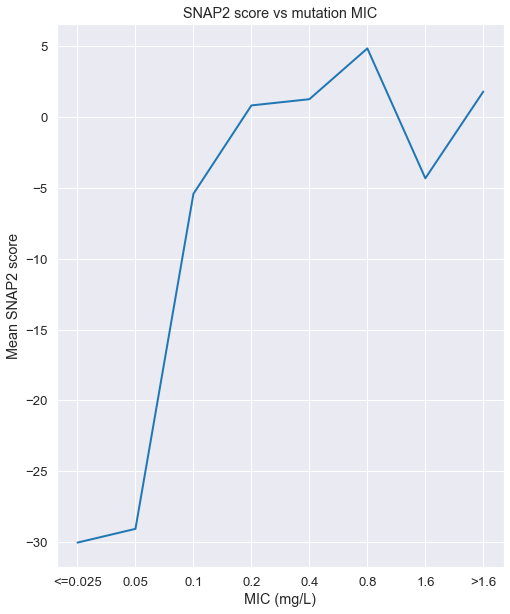

In [37]:
#copy and paste above but apply to SNAP2, not tf
tf_df = unique_MIC_muts[['SNAP2_score','MIC_values']]

MIC1 = []
MIC2 = []
MIC3 = []
MIC4 = []
MIC5 = []
MIC6 = []
MIC7 = []
MIC8 = []
MIC_groups = [MIC1,MIC2,MIC3,MIC4,MIC5,MIC6,MIC7,MIC8]
MICs = ['<=0.025','0.05','0.1','0.2','0.4','0.8', '1.6','>1.6']
col_no = tf_df.columns.get_loc('SNAP2_score')

for i,v in enumerate(MICs):
    row_no = -1
    for b in tf_df['MIC_values']:
        row_no += 1
        if v == b:
            SNAP2_score = tf_df.iloc[row_no,col_no]
            (MIC_groups[i]).append(SNAP2_score)

MIC1_mean,MIC1_std = mean_and_std(MIC1)
MIC2_mean,MIC2_std = mean_and_std(MIC2)
MIC3_mean,MIC3_std = mean_and_std(MIC3)
MIC4_mean,MIC4_std = mean_and_std(MIC4)
MIC5_mean,MIC5_std = mean_and_std(MIC5)
MIC6_mean,MIC6_std = mean_and_std(MIC6)
MIC7_mean,MIC7_std = mean_and_std(MIC7)
MIC8_mean,MIC8_std = mean_and_std(MIC8)
MIC_data = [MIC1_mean,MIC2_mean,MIC3_mean,MIC4_mean,MIC5_mean,MIC6_mean,MIC7_mean,MIC8_mean]
MIC_stds = [MIC1_std,MIC2_std,MIC3_std,MIC4_std,MIC5_std,MIC6_std,MIC7_std,MIC8_std]

MICs = ['<=0.025','0.05','0.1','0.2','0.4','0.8', '1.6','>1.6']
plt.plot(MICs, MIC_data, linewidth = '2', c = 'C1')
plt.ylabel('Mean SNAP2 score')
plt.xlabel('MIC (mg/L)')
plt.title('SNAP2 score vs mutation MIC')
#plt.savefig('figures/SNAP2_vs_MIC.png')
#plt.errorbar(x, MIC_data, yerr = MIC_stds, fmt = ' ')
plt.show()


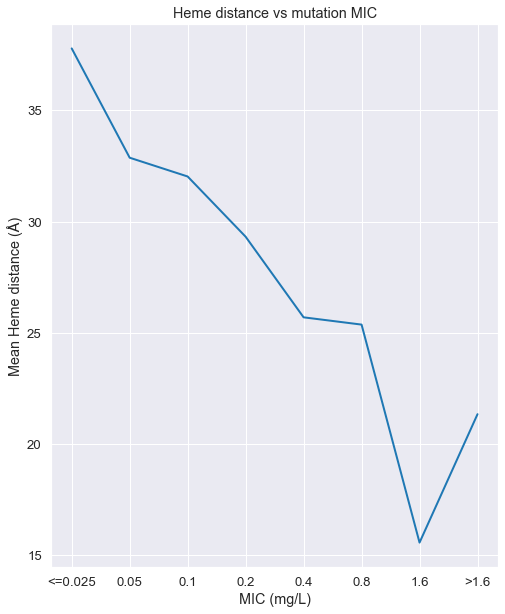

In [38]:
#copy and paste above but apply to Hem_dist, not tf
tf_df = unique_MIC_muts[['Hem_dist','MIC_values']]

MIC1 = []
MIC2 = []
MIC3 = []
MIC4 = []
MIC5 = []
MIC6 = []
MIC7 = []
MIC8 = []
MIC_groups = [MIC1,MIC2,MIC3,MIC4,MIC5,MIC6,MIC7,MIC8]
MICs = ['<=0.025','0.05','0.1','0.2','0.4','0.8', '1.6','>1.6']
col_no = tf_df.columns.get_loc('Hem_dist')

for i,v in enumerate(MICs):
    row_no = -1
    for b in tf_df['MIC_values']:
        row_no += 1
        if v == b:
            Hem_dist = tf_df.iloc[row_no,col_no]
            (MIC_groups[i]).append(Hem_dist)

MIC1_mean,MIC1_std = mean_and_std(MIC1)
MIC2_mean,MIC2_std = mean_and_std(MIC2)
MIC3_mean,MIC3_std = mean_and_std(MIC3)
MIC4_mean,MIC4_std = mean_and_std(MIC4)
MIC5_mean,MIC5_std = mean_and_std(MIC5)
MIC6_mean,MIC6_std = mean_and_std(MIC6)
MIC7_mean,MIC7_std = mean_and_std(MIC7)
MIC8_mean,MIC8_std = mean_and_std(MIC8)
MIC_data = [MIC1_mean,MIC2_mean,MIC3_mean,MIC4_mean,MIC5_mean,MIC6_mean,MIC7_mean,MIC8_mean]
MIC_stds = [MIC1_std,MIC2_std,MIC3_std,MIC4_std,MIC5_std,MIC6_std,MIC7_std,MIC8_std]

MICs = ['<=0.025','0.05','0.1','0.2','0.4','0.8', '1.6','>1.6']
plt.plot(MICs, MIC_data, linewidth = '2', c = 'C1')
plt.ylabel('Mean Heme distance (Å)')
plt.xlabel('MIC (mg/L)')
plt.title('Heme distance vs mutation MIC')
#plt.savefig('figures/Hem_dist_vs_MIC.png')
#plt.errorbar(x, MIC_data, yerr = MIC_stds, fmt = ' ')
plt.show()

Figure comparing best model with clinical dataset with Xpert

In [39]:
multiclass_binary_df = pd.DataFrame({'Model':['Logistic Regression','Linear SVC','Decision Tree','Random Forest',\
                                  'IT Ordinal Regression','AT Ordinal Regression'],\
                          'Very Major Error':[indirect_model_quality.iloc[0,0],indirect_model_quality.iloc[0,1],\
                                              indirect_model_quality.iloc[0,2],indirect_model_quality.iloc[0,3],\
                          indirect_model_quality.iloc[0,4],indirect_model_quality.iloc[0,5]],\
                          'Major Error':[indirect_model_quality.iloc[1,0],indirect_model_quality.iloc[1,1],\
                                              indirect_model_quality.iloc[1,2],indirect_model_quality.iloc[1,3],\
                          indirect_model_quality.iloc[1,4],indirect_model_quality.iloc[1,5]]})

In [40]:
clinical_df = pd.DataFrame({'Model':['Optimum RF','Xpert® MTB/XDR'],\
                          'Very Major Error':[0.21439509954058195,8.614232209737828],\
                          'Major Error':[12.837837837837837,0.9478672985781991]})

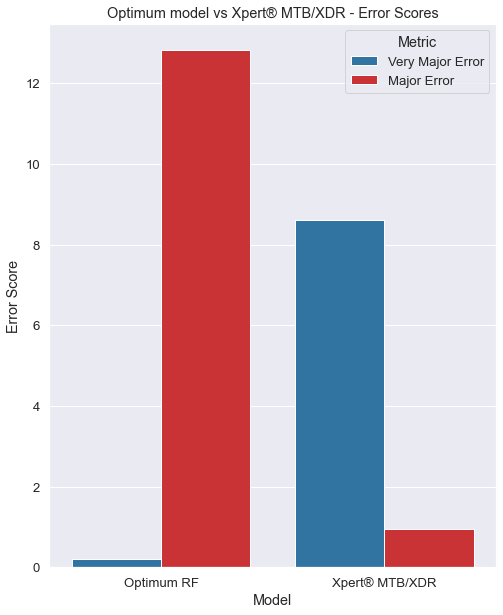

In [41]:
tidy = clinical_df.melt(id_vars='Model', var_name='Metric', value_name='Percentage')
sns.set_palette(sns.color_palette('Paired'))
sns.barplot(data=tidy, x='Model', y='Percentage', hue='Metric',palette = ['C1','C5'])
sns.set(font_scale=1.2)
plt.ylabel('Error Score')
plt.title('Optimum model vs Xpert® MTB/XDR - Error Scores')
#plt.xticks(rotation = 10)
#plt.savefig('figures/clinical_error_scores.png')
plt.show()